[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.86      0.76      0.81        25

    accuracy                           0

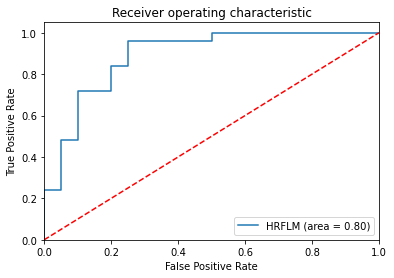

In [1]:
#Importing essential libraries

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%run hybrid.ipynb

import os
os.listdir()

import warnings
warnings.filterwarnings('ignore')


In [2]:

#Importing and understanding our dataset
    
dataset = pd.read_csv("cleveland.csv")

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(297, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [8]:
dataset.target.value_counts()

0    160
1    137
Name: target, dtype: int64

In [9]:
dataset["target"].describe()

count    297.000000
mean       0.461279
std        0.499340
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
dataset["target"].unique()

array([0, 1], dtype=int64)

In [11]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
thalach     0.423817
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
Name: target, dtype: float64


0    160
1    137
Name: target, dtype: int64


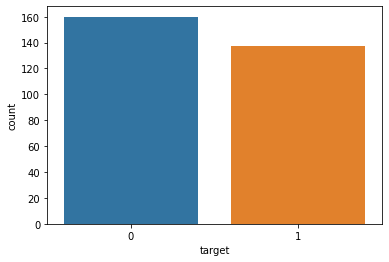

In [12]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 52.81
Percentage of patience with heart problems: 45.21


In [14]:
dataset["sex"].unique()

array([1., 0.])

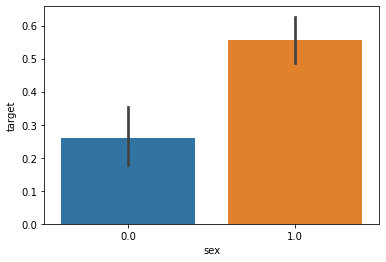

In [15]:
sns.barplot(dataset["sex"],y)

In [16]:
dataset["cp"].unique()

array([1., 4., 3., 2.])

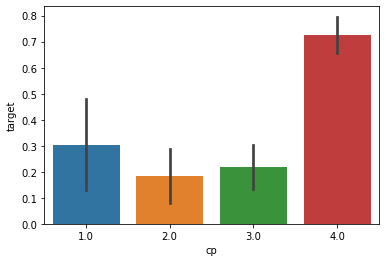

In [17]:
sns.barplot(dataset["cp"],y)

In [18]:
dataset["fbs"].describe()

count    297.000000
mean       0.144781
std        0.352474
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [19]:
dataset["fbs"].unique()

array([1., 0.])

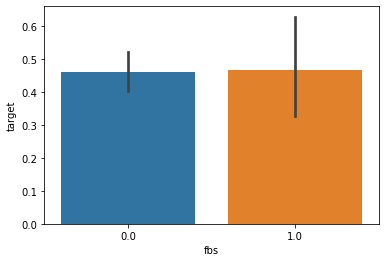

In [20]:
sns.barplot(dataset["fbs"],y)

In [21]:
dataset["restecg"].unique()

array([2., 0., 1.])

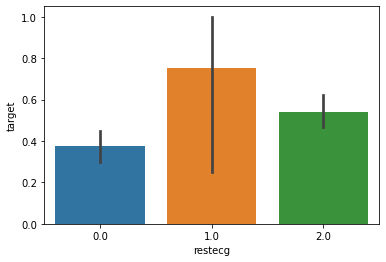

In [22]:
sns.barplot(dataset["restecg"],y)

In [23]:
dataset["exang"].unique()

array([0., 1.])

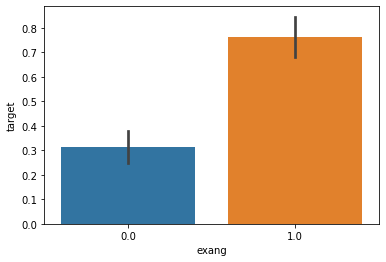

In [24]:
sns.barplot(dataset["exang"],y)

In [25]:
dataset["slope"].unique()

array([3., 2., 1.])

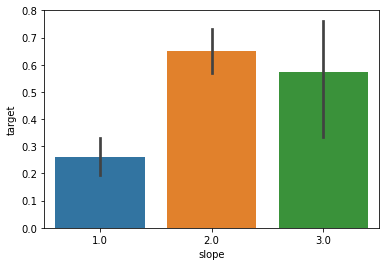

In [26]:
sns.barplot(dataset["slope"],y)

In [27]:
dataset["ca"].unique()

array([0., 3., 2., 1.])

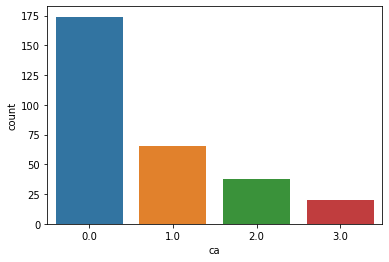

In [28]:
sns.countplot(dataset["ca"])

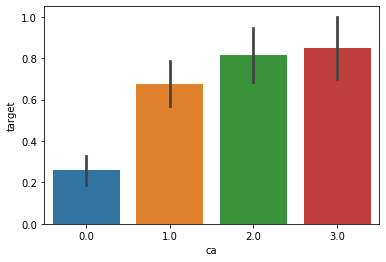

In [29]:
sns.barplot(dataset["ca"],y)

In [30]:
dataset["thal"].unique()

array([6., 3., 7.])

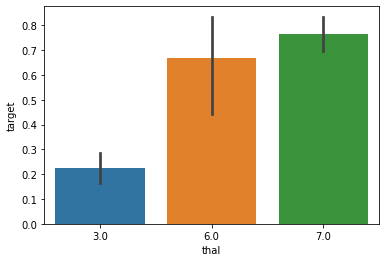

In [31]:
sns.barplot(dataset["thal"],y)

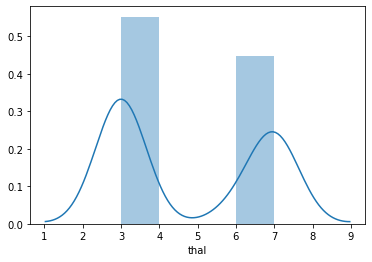

In [32]:
sns.distplot(dataset["thal"])

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 45/297, random_state = 101)

In [34]:
X_train.shape

(252, 13)

In [35]:
X_test.shape

(45, 13)

In [36]:
y_train.shape

(252,)

In [37]:
y_test.shape

(45,)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [39]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=10001)
dtclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10001)

In [40]:
# Predicting the Test set results
dty_pred = dtclassifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print("ACCURACY",accuracy_score(y_test,dty_pred))

ACCURACY 0.8


In [42]:
##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(y_test, dty_pred) 





In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dty_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.67      0.80      0.73        15

    accuracy                           0.80        45
   macro avg       0.78      0.80      0.78        45
weighted avg       0.81      0.80      0.80        45



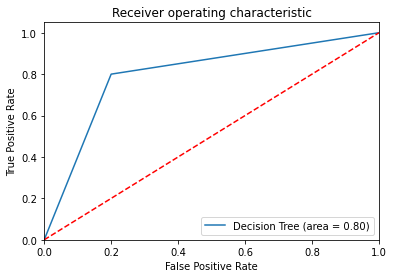

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, dtclassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtclassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [45]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)


GaussianNB()

In [46]:
# Predicting the Test set results

nby_pred = nbclassifier.predict(X_test)

In [47]:
#ACCURACY SCORE



accuracy_score(y_test,nby_pred)

0.8444444444444444

In [48]:
# Making the Confusion Matrix


cm = confusion_matrix(y_test,nby_pred)

In [49]:
#Interpretation:

print(classification_report(y_test, nby_pred))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.79      0.73      0.76        15

    accuracy                           0.84        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.84      0.84      0.84        45



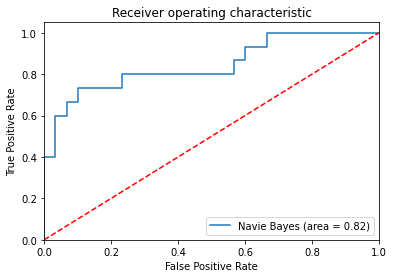

In [50]:

logit_roc_auc = roc_auc_score(y_test, nbclassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nbclassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Navie Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression
lgregressor =LogisticRegression()

lgregressor.fit(X_train,y_train)

LogisticRegression()

In [52]:

#Predict the test set results

lry_pred=lgregressor.predict(X_test)

In [53]:
#checking the accuracy for predicted results


accuracy_score(y_test,lry_pred)

0.8666666666666667

In [54]:
# Making the Confusion Matrix


cm = confusion_matrix(y_test, lry_pred)

In [55]:
#Interpretation:


print(classification_report(y_test, lry_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.85      0.73      0.79        15

    accuracy                           0.87        45
   macro avg       0.86      0.83      0.84        45
weighted avg       0.87      0.87      0.86        45



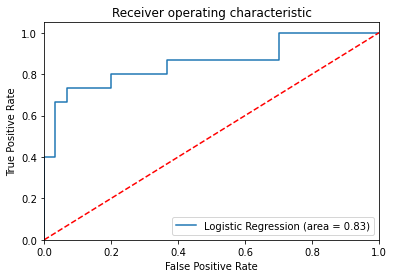

In [56]:

from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lgregressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgregressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
# Fitting  Random Forest to the Training set

from sklearn.ensemble import RandomForestClassifier
rfclassifier =RandomForestClassifier(n_estimators=50)
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [58]:
# Predicting the Test set results
rfy_pred = rfclassifier.predict(X_test)

In [59]:

accuracy_score(y_test,rfy_pred)

0.7777777777777778

In [60]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, rfy_pred)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.67      0.67      0.67        15

    accuracy                           0.78        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.78      0.78      0.78        45



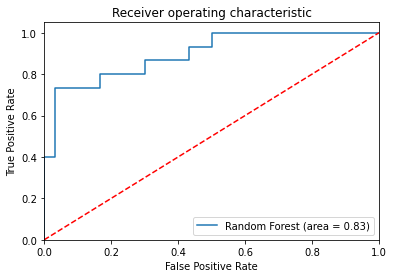

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfy_pred))
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [62]:
##SUPPORT VECTOR CLASSIFICATIONS

##checking for different kernels

from sklearn.svm import SVC


svmclassifier = SVC(kernel = 'rbf', random_state = 0 )
svmclassifier.fit(X_train, y_train)

SVC(random_state=0)

In [63]:
# Predicting the Test set results

svmy_pred = classifier.predict(X_test)

In [64]:
accuracy_score(y_test,svmy_pred)



0.8666666666666667

In [65]:
cm = confusion_matrix(y_test,svmy_pred)


In [66]:
print(classification_report(y_test, svmy_pred))



              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.85      0.73      0.79        15

    accuracy                           0.87        45
   macro avg       0.86      0.83      0.84        45
weighted avg       0.87      0.87      0.86        45



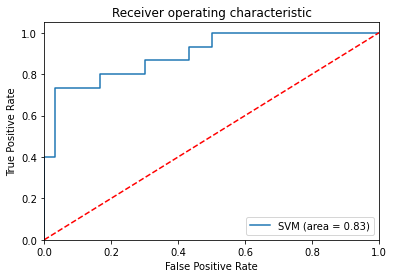

In [67]:
logit_roc_auc = roc_auc_score(y_test,svmy_pred)
fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
# Fitting MLP to the Training set

from sklearn.neural_network import MLPClassifier
mlclassifier = MLPClassifier(hidden_layer_sizes=(8,8,8),activation='logistic',solver='adam',max_iter=500)
mlclassifier.fit(X_train, y_train)



MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [69]:
# Predicting the Test set results
mly_pred = mlclassifier.predict(X_test)


In [70]:
cm = confusion_matrix(y_test, mly_pred)



In [71]:
print(accuracy_score(y_test,mly_pred)*100)

86.66666666666667


In [72]:
print(classification_report(y_test, mly_pred))


              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.85      0.73      0.79        15

    accuracy                           0.87        45
   macro avg       0.86      0.83      0.84        45
weighted avg       0.87      0.87      0.86        45



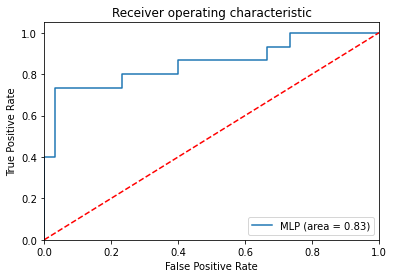

In [73]:
logit_roc_auc = roc_auc_score(y_test, mlclassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlclassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
